Here we explore the speed on a decently sized genotype matrix of Western-Eurasians from the `human origins dataset`. We compared the speed of the rank-1 udpate and truncated svd jackknife iterations.

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the package!
import pcshrink

plt.style.use("seaborn-white")

## Functions

In [5]:
def get_genotype_matrix(geno_path, n, p):
    """Gets the genotype matrix stored as a
    numpy array
    """
    # read the geno file
    with open(geno_path, "r") as f:
        matstr = f.read().replace("\n", "")

    # convert to long array
    ys = np.fromstring(matstr, dtype=np.int8) - 48
    
    # reshape to p x n matrix
    Y = ys.reshape(p, n).astype(np.float32)
    
    # replace 9s with nans
    Y[Y == 9] = np.nan
    
    return(Y)

## Experiment

Read the data ...

In [7]:
n = 777
p = 594924
k = 2

#### genoty mat ####
Y = get_genotype_matrix("../data/data_fil.geno", n=n, p=p)
print(Y.shape)

#### ind df ####
ind_df = pd.read_table("../data/data_fil.ind", sep="\s+", header=None)
ind_df.columns = ["ind", "sex", "clst"]
print(ind_df.head())

#### snp df ####
snp_df = pd.read_table("../data/data_fil.snp", sep="\s+", header=None)
snp_df.columns = ["snp", "chrom", "cm", "pos", "a1", "a2"]

# extract idx of all snps on the autosomes
auto_idx = snp_df[snp_df["chrom"] <= 22].index
print(auto_idx.shape)
print(snp_df.head())

/project/jnovembre/jhmarcus/src/miniconda3/envs/pcshrink_e/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


(594924, 777)
         ind sex    clst
0  HGDP00511   M  French
1  HGDP00512   M  French
2  HGDP00513   F  French
3  HGDP00514   F  French
4  HGDP00515   M  French
(594924,)
             snp  chrom   cm     pos a1 a2
0  Affx-13943225      1  0.0  752566  G  A
1  Affx-14804912      1  0.0  842013  T  G
2  Affx-15453076      1  0.0  891021  G  A
3  Affx-15485777      1  0.0  903426  C  T
4  Affx-15871758      1  0.0  949654  A  G


Normalize the data and run intial PCA

In [9]:
# center and scale the data
norm = pcshrink.Normalizer(Y, eps=0.05, scale_type="patterson")

# construct the ShrinakgeCorrector
pc = pcshrink.ShrinkageCorrector(norm.Y, k=k)
L = pc.L

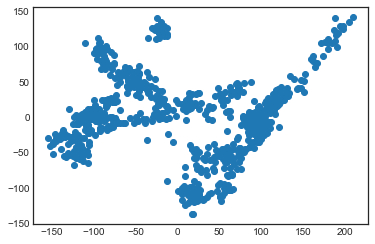

In [10]:
plt.scatter(L[:, 0], L[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")

Jackknife estimate of the shrinkage correction factor ...

In [11]:
%%time
# use rank-1 downdate for each held-out ind
pc.jackknife(downdate=True, o=5)
print(pc.tau)

holding out sample 0
holding out sample 5
holding out sample 10
holding out sample 15
holding out sample 20
holding out sample 25
holding out sample 30
holding out sample 35
holding out sample 40
holding out sample 45
holding out sample 50
holding out sample 55
holding out sample 60
holding out sample 65
holding out sample 70
holding out sample 75
holding out sample 80
holding out sample 85
holding out sample 90
holding out sample 95
holding out sample 100
holding out sample 105
holding out sample 110
holding out sample 115
holding out sample 120
holding out sample 125
holding out sample 130
holding out sample 135
holding out sample 140
holding out sample 145
holding out sample 150
holding out sample 155
holding out sample 160
holding out sample 165
holding out sample 170
holding out sample 175
holding out sample 180
holding out sample 185
holding out sample 190
holding out sample 195
holding out sample 200
holding out sample 205
holding out sample 210
holding out sample 215
holding ou

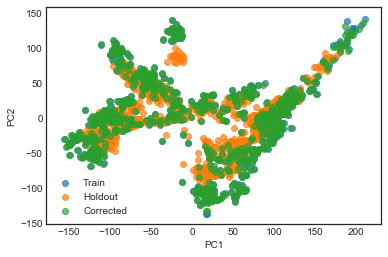

In [25]:
plt.scatter(L[:, 0], L[:, 1], label="Train", alpha=.7)
plt.scatter(pc.L_shrunk[:, 0], pc.L_shrunk[:, 1], label="Holdout", alpha=.7)
plt.scatter(pc.tau[0] * pc.L_shrunk[:, 0], pc.tau[1] * pc.L_shrunk[:, 1], label="Corrected", alpha=.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

Lets try the svd approach ...

In [26]:
%%time
# use rank-1 downdate for each held-out ind
pc.jackknife(downdate=False, o=5)
print(pc.tau)

holding out sample 0
holding out sample 5
holding out sample 10
holding out sample 15
holding out sample 20
holding out sample 25
holding out sample 30
holding out sample 35
holding out sample 40
holding out sample 45
holding out sample 50
holding out sample 55
holding out sample 60
holding out sample 65
holding out sample 70
holding out sample 75
holding out sample 80
holding out sample 85
holding out sample 90
holding out sample 95
holding out sample 100
holding out sample 105
holding out sample 110
holding out sample 115
holding out sample 120
holding out sample 125
holding out sample 130
holding out sample 135
holding out sample 140
holding out sample 145
holding out sample 150
holding out sample 155
holding out sample 160
holding out sample 165
holding out sample 170
holding out sample 175
holding out sample 180
holding out sample 185
holding out sample 190
holding out sample 195
holding out sample 200
holding out sample 205
holding out sample 210
holding out sample 215
holding ou

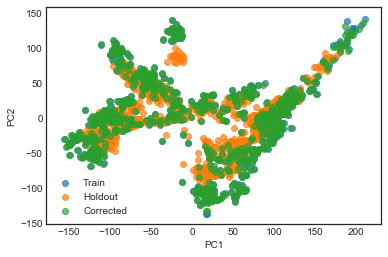

In [27]:
plt.scatter(L[:, 0], L[:, 1], label="Train", alpha=.7)
plt.scatter(pc.L_shrunk[:, 0], pc.L_shrunk[:, 1], label="Holdout", alpha=.7)
plt.scatter(pc.tau[0] * pc.L_shrunk[:, 0], pc.tau[1] * pc.L_shrunk[:, 1], label="Corrected", alpha=.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()